## **ЛАБОРАТОРНАЯ РАБОТА 2**

## **1. Установка библиотеки vk**

In [1]:
#!pip install vk_api

In [6]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

## **2. Подключение по токену**

### **2.1. Создание приложения в разделе "Разработчикам" на сайте vk.com и получение ID приложения**

In [4]:
# 7861558

### **2.2. Получение разрешений**

In [5]:
#https://oauth.vk.com/authorize?client_id=7861558&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends,photos,audio,video,status,wall,groups,notifications,stories,offline&response_type=token
# vk1.a.BNFRxciCHEFJOO1GMaGmZRyGGoG8qdYRDAj78uYPDz3igpc31szFBM1AM1Vl7tOB6BhdhyErSvxl014xNOLRbwGYaCyjbydVOWlaMB7dWslSkADQ21RtU1U-hgPjR5DXtOUS-Y3aLw2EOwJf33Q93cvXXwMDX07MILmpvdFItSbmD2LbASBSW2_TZvvig1KFvzZYenWYp7fbiJEg33NBlQ


### **2.3. Получение токена**

In [6]:
#https://oauth.vk.com/blank.html#access_token=f2c018918cd901eec782b174093bcf6e70d9df70a67fd8567ee3690b6ee35f3728dcdb0a8c30ebaba8f05&expires_in=0&user_id=81423997

### **2.4. Запуск сессии**

In [46]:
import vk_api

session = vk_api.VkApi(token='vk1.a.BNFRxciCHEFJOO1GMaGmZRyGGoG8qdYRDAj78uYPDz3igpc31szFBM1AM1Vl7tOB6BhdhyErSvxl014xNOLRbwGYaCyjbydVOWlaMB7dWslSkADQ21RtU1U-hgPjR5DXtOUS-Y3aLw2EOwJf33Q93cvXXwMDX07MILmpvdFItSbmD2LbASBSW2_TZvvig1KFvzZYenWYp7fbiJEg33NBlQ')
vk = session.get_api()

## **3. Выгрузка друзей**

In [62]:
friends = vk.friends.get()['items']
print(len(friends))

154


In [63]:
friends_ids_list = friends
fields_name = [
               'first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
               'home_town', 'has_mobile', 'followers_count', 'common_count', 
               'is_closed', 'can_access_closed', 'can_see_audio',
               'online', 'city', 'timezone', 'can_post',
               'can_write_private_message', 'can_see_all_posts',
               'contacts', 'status', 'relation', 'universities',
               'nickname', 'deactivated', 'counters', 'has_photo',
               'occupation', 'site', 'wall_default'
              ]

In [60]:
dict_users_requests = {}
results = []
for friend in friends_ids_list:
  dict_results = {}
  dict_users_requests = {}
  user = vk.users.get(user_ids = friend, fields = fields_name)[0]
  for column in fields_name:
    try:
      dict_results = {column: user[column]}
    except:
      dict_results = {column: np.nan}
    finally:
      dict_users_requests.update(dict_results)
  time.sleep(0.3)
  results.append(dict_users_requests)

df = pd.DataFrame(results)

with pd.ExcelWriter('friends.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')

In [117]:
df = pd.read_excel('friends.xlsx')
df.head()

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,0,Денис,Бекасов,3113047,2,28.4.1991,"{'id': 1, 'title': 'Россия'}",Москва и Королёв,1.0,670.0,...,NaN,0.0,"[{'chair': 1897, 'chair_name': 'Программное об...",NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 56, 'f...",1,"{'id': 40427933, 'name': 'МГТУ им. Н.Э. Бауман...",NaN,all
1,1,Ирина,Шушакова,6097193,1,NaN,"{'id': 1, 'title': 'Россия'}",Тольятти,1.0,1202.0,...,Мои курицы-самые лучшие курицы в мире. Самые к...,0.0,"[{'chair': 111112, 'chair_name': 'Педагогика и...",NaN,NaN,"{'albums': 13, 'audios': 290, 'followers': 237...",1,"{'name': 'МБОУ ""Гимназия 9""', 'type': 'work'}",NaN,all
2,2,Сергей,Захаров,6745477,2,26.9.1977,"{'id': 1, 'title': 'Россия'}",Тольятти,1.0,NaN,...,всегда есть хорошие новости,1.0,"[{'city': 143, 'country': 1, 'education_form':...",NaN,NaN,"{'albums': 12, 'audios': 0, 'friends': 459, 'o...",1,"{'id': 793290, 'name': 'Тольяттинский Политехн...",kurskontr@gmail.com,all
3,3,Маша,Сажина,13570931,1,2.11.1994,"{'id': 1, 'title': 'Россия'}",Липецк,1.0,NaN,...,NaN,0.0,"[{'city': 1, 'country': 1, 'education_form': '...",NaN,NaN,"{'albums': 3, 'audios': 602, 'friends': 211, '...",1,"{'id': 348, 'name': 'Финансовый университет (Ф...",NaN,all
4,4,Antik,Designer,13773013,2,NaN,"{'id': 1, 'title': 'Россия'}",Москва,1.0,657.0,...,"To see the world, things dangerous to come to,...",0.0,"[{'chair': 2036808, 'chair_name': 'Внешнеэконо...",NaN,NaN,"{'albums': 0, 'audios': 1111, 'followers': 72,...",1,"{'name': 'Mindhouse Assets Inc.', 'type': 'work'}",NaN,all


## **4. Работа с признаками**

In [132]:
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'pink', 'purple', 'brown', 'grey']
def draw_plot(df, column, xlabel, ylabel, title):
    df.groupby([column]).size().plot(kind = 'bar', color = colors)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()

### **4.1. Работа с признаком sex**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


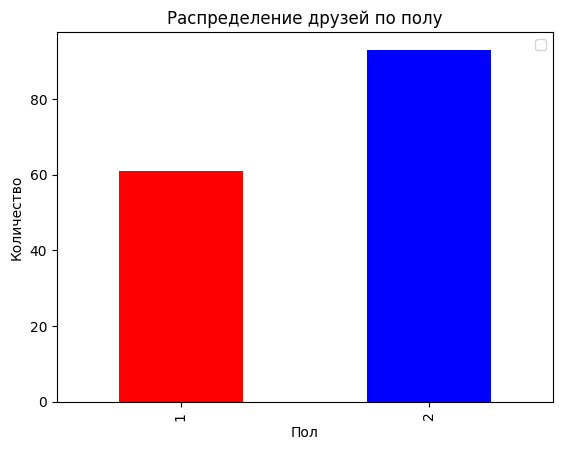

In [157]:
draw_plot(df, 'sex', 'Пол', 'Количество', 'Распределение друзей по полу')

### **4.2. Работа с признаком home_town**

In [158]:
df.home_town.unique()

array(['Москва и Королёв', 'Тольятти', 'Липецк', 'Москва', nan,
       'Чапаевск', 'Киселевск', 'Уфа', 'Тольятти , Самара', 'Зеленоград',
       'Армавир', 'Орск', 'челябинск',
       'Челябинск *̡͌l̡*̡̡ ̴̡ı̴̴̡ ̡̡_|̲̲̲͡͡͡▫ ̲͡ ̲̲̲͡͡π̲̲͡͡ ̲̲͡▫̲|',
       'тольятти', 'Самара', 'Челябинск', 'Việt Nam', 'Санкт-Петербург',
       'Трабзон', 'Ижевск', 'чебоксары', 'Ташкент', 'Израиль, Москва',
       'Мариинск', 'Саратов', 'Свердловск'], dtype=object)

#### **4.2.1. Чистка городов**

In [159]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['home_town'])
df_copy.home_town.unique()

array(['Москва и Королёв', 'Тольятти', 'Липецк', 'Москва', 'Чапаевск',
       'Киселевск', 'Уфа', 'Тольятти , Самара', 'Зеленоград', 'Армавир',
       'Орск', 'челябинск',
       'Челябинск *̡͌l̡*̡̡ ̴̡ı̴̴̡ ̡̡_|̲̲̲͡͡͡▫ ̲͡ ̲̲̲͡͡π̲̲͡͡ ̲̲͡▫̲|',
       'тольятти', 'Самара', 'Челябинск', 'Việt Nam', 'Санкт-Петербург',
       'Трабзон', 'Ижевск', 'чебоксары', 'Ташкент', 'Израиль, Москва',
       'Мариинск', 'Саратов', 'Свердловск'], dtype=object)

##### **4.2.1.1. Работа с городом Набережные Челны**

In [160]:
for i in df_copy.home_town:
    if '*̡͌l̡*̡̡ ̴̡ı̴̴̡ ̡̡_|̲̲̲͡͡͡▫ ̲͡ ̲̲̲͡͡π̲̲͡͡ ̲̲͡▫̲|' in i.lower(): df_copy.home_town.replace(i, 'Челябинск', inplace=True)
    elif 'челябинск' in i.lower(): df_copy.home_town.replace(i, 'Челябинск', inplace=True)
    elif 'тольятти' in i.lower(): df_copy.home_town.replace(i, 'Тольятти', inplace=True)
df_copy.home_town.unique()

array(['Москва и Королёв', 'Тольятти', 'Липецк', 'Москва', 'Чапаевск',
       'Киселевск', 'Уфа', 'Зеленоград', 'Армавир', 'Орск', 'Челябинск',
       'Самара', 'Việt Nam', 'Санкт-Петербург', 'Трабзон', 'Ижевск',
       'чебоксары', 'Ташкент', 'Израиль, Москва', 'Мариинск', 'Саратов',
       'Свердловск'], dtype=object)

##### **4.2.1.2. Замена пустых значений и прочих**

In [161]:
df_copy.home_town.replace('nan', 'Другой', inplace=True)
df_copy.home_town.replace('', 'Другой', inplace=True)
df_copy.home_town.replace('Москва ', 'Москва', inplace=True)

for i in df_copy.home_town:
    if 'ессентуки' in i.lower(): df_copy.home_town.replace(i, 'Санкт-Петербург', inplace=True)
    elif 'самара' in i.lower(): df_copy.home_town.replace(i, 'Самара', inplace=True)
    elif 'айхал' in i.lower(): df_copy.home_town.replace(i, 'Айхал', inplace=True)

df_copy.home_town.unique()

array(['Москва и Королёв', 'Тольятти', 'Липецк', 'Москва', 'Чапаевск',
       'Киселевск', 'Уфа', 'Зеленоград', 'Армавир', 'Орск', 'Челябинск',
       'Самара', 'Việt Nam', 'Санкт-Петербург', 'Трабзон', 'Ижевск',
       'чебоксары', 'Ташкент', 'Израиль, Москва', 'Мариинск', 'Саратов',
       'Свердловск'], dtype=object)

### **4.3. Работа с признаком has_mobile**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


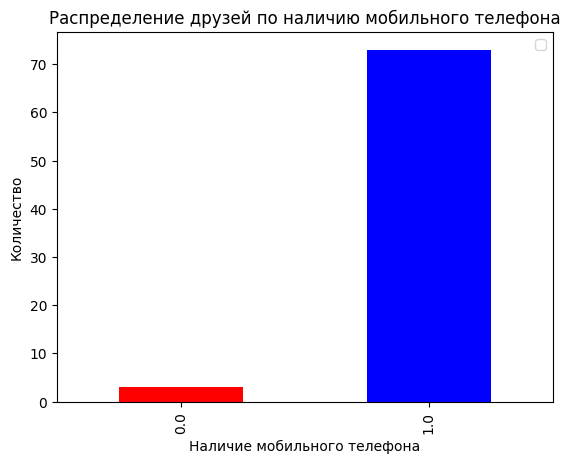

In [162]:
draw_plot(df_copy, 'has_mobile', 'Наличие мобильного телефона', 'Количество', 'Распределение друзей по наличию мобильного телефона')

#### **4.3.1. Удаление признака has_mobile**

In [163]:
df_copy = df_copy.drop(['has_mobile'], axis=1)
df_copy.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'id', 'sex', 'bdate',
       'country', 'home_town', 'followers_count', 'common_count', 'is_closed',
       'can_access_closed', 'can_see_audio', 'online', 'city', 'timezone',
       'can_post', 'can_write_private_message', 'can_see_all_posts',
       'contacts', 'status', 'relation', 'universities', 'nickname',
       'deactivated', 'counters', 'has_photo', 'occupation', 'site',
       'wall_default'],
      dtype='object')

### **4.4. Работа с признаком followers_count**

In [164]:
print('Кол-во друзей с неизвестными подписчиками:', df_copy[df_copy['followers_count'].isnull()].shape[0])

Кол-во друзей с неизвестными подписчиками: 17


<Axes: title={'center': 'Кол-во подписчиков'}, xlabel='id', ylabel='followers_count'>

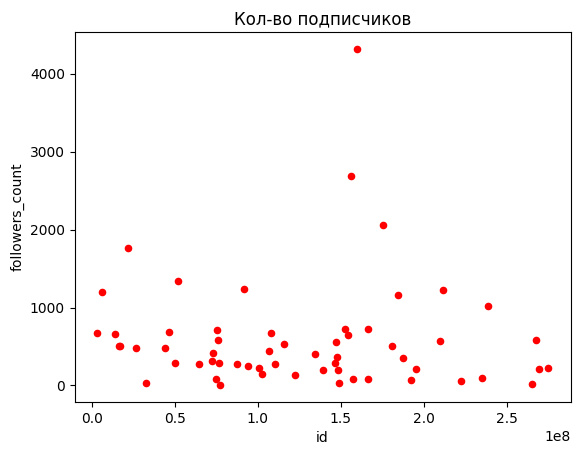

In [165]:
df_copy.plot(kind='scatter', x='id', y='followers_count', color='red', title='Кол-во подписчиков')

<Axes: title={'center': 'Кол-во подписчиков'}, xlabel='id', ylabel='followers_count'>

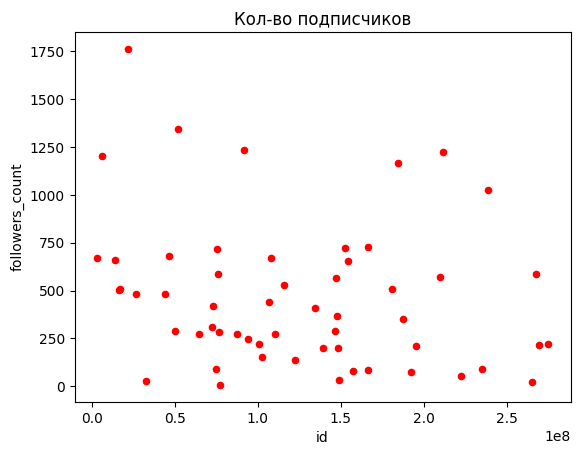

In [166]:
df_copy = df_copy.drop(df_copy[df_copy.followers_count > 2000].index)
df_copy.plot(kind='scatter', x='id', y='followers_count', color='red', title='Кол-во подписчиков')

### **4.5. Работа с признаком is_closed**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


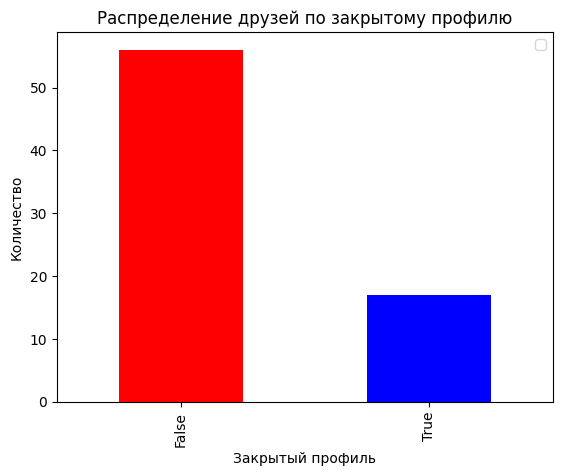

In [167]:
draw_plot(df_copy, 'is_closed', 'Закрытый профиль', 'Количество', 'Распределение друзей по закрытому профилю')

In [168]:
print('Кол-во друзей с пустым значением публичности профиля:', df_copy[df_copy['can_access_closed'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности профиля: 0


In [169]:
df_copy['is_closed'].fillna(False, inplace = True)

### **4.6. Работа с признаком can_access_closed**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


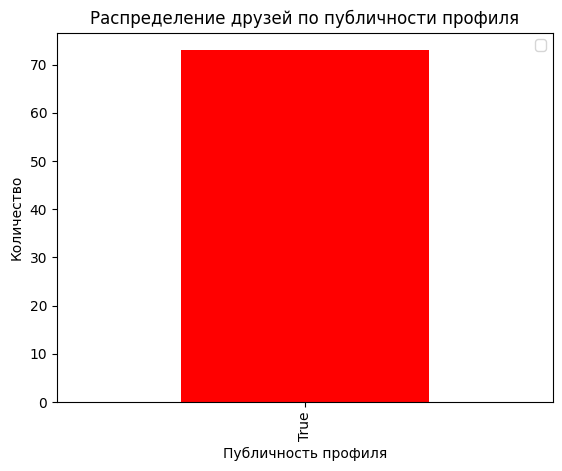

In [170]:
draw_plot(df_copy, 'can_access_closed', 'Публичность профиля', 'Количество', 'Распределение друзей по публичности профиля')

In [93]:
len(df_copy[df_copy.can_access_closed != True])

0

#### **4.6.1. Удаление признака can_access_closed по причине наличия значения True у всех друзей**

In [171]:
df_copy = df_copy.drop(['can_access_closed'], axis=1)
df_copy.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'id', 'sex', 'bdate',
       'country', 'home_town', 'followers_count', 'common_count', 'is_closed',
       'can_see_audio', 'online', 'city', 'timezone', 'can_post',
       'can_write_private_message', 'can_see_all_posts', 'contacts', 'status',
       'relation', 'universities', 'nickname', 'deactivated', 'counters',
       'has_photo', 'occupation', 'site', 'wall_default'],
      dtype='object')

### **4.7. Работа с признаком can_see_audio**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


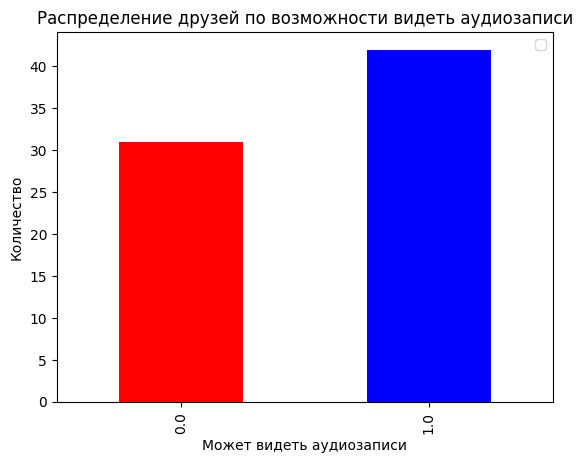

In [172]:
draw_plot(df_copy, 'can_see_audio', 'Может видеть аудиозаписи', 'Количество', 'Распределение друзей по возможности видеть аудиозаписи')

In [173]:
print('Кол-во друзей с пустым значением публичности аудио:', df_copy[df_copy['can_see_audio'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности аудио: 0


### **4.8. Работа с признаком can_see_all_posts**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


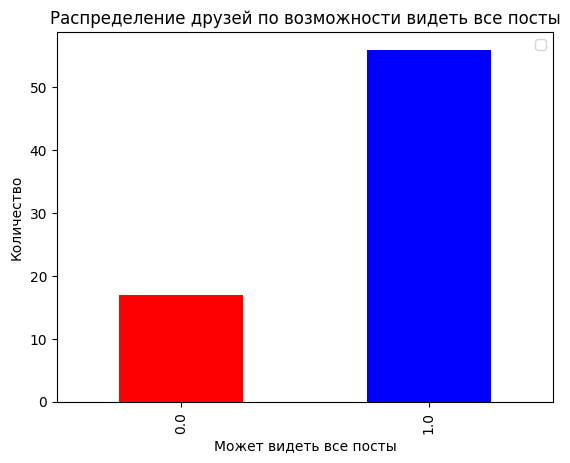

In [174]:

draw_plot(df_copy, 'can_see_all_posts', 'Может видеть все посты', 'Количество', 'Распределение друзей по возможности видеть все посты')

In [175]:
print('Кол-во друзей с пустым значением публичности постов: ', df_copy[df_copy['can_see_all_posts'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности постов:  0


### **4.9. Работа с признаком online**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


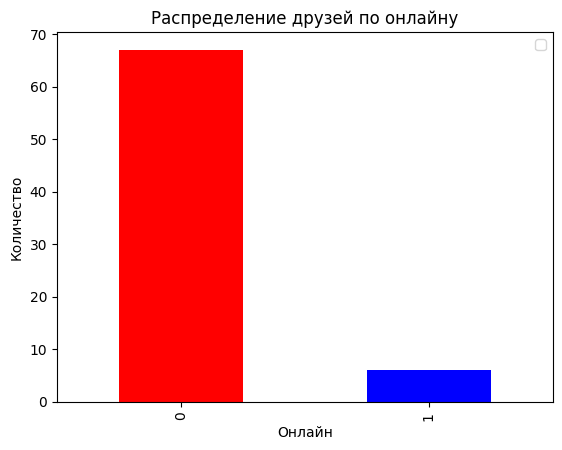

In [176]:
draw_plot(df_copy, 'online', 'Онлайн', 'Количество', 'Распределение друзей по онлайну')

In [177]:
print('Кол-во друзей с пустым значением онлайна: ', df_copy[df_copy['online'].isnull()].shape[0])

Кол-во друзей с пустым значением онлайна:  0


### **4.10. Работа с признаком timezone**

In [178]:
df_copy.timezone.unique()

array([nan])

In [179]:
del df_copy['timezone']

In [180]:
df_copy.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'id', 'sex', 'bdate',
       'country', 'home_town', 'followers_count', 'common_count', 'is_closed',
       'can_see_audio', 'online', 'city', 'can_post',
       'can_write_private_message', 'can_see_all_posts', 'contacts', 'status',
       'relation', 'universities', 'nickname', 'deactivated', 'counters',
       'has_photo', 'occupation', 'site', 'wall_default'],
      dtype='object')

### **4.11. Работа с признаком can_post**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


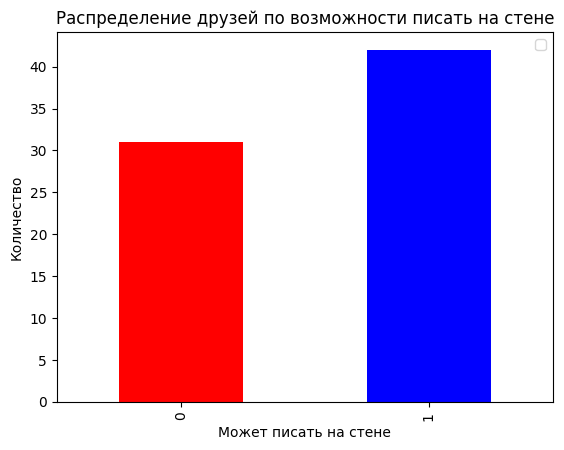

In [181]:
draw_plot(df_copy, 'can_post', 'Может писать на стене', 'Количество', 'Распределение друзей по возможности писать на стене')

In [182]:
print('Кол-во друзей с пустым значением публичности стены: ', df_copy[df_copy['can_post'].isnull()].shape[0])

Кол-во друзей с пустым значением публичности стены:  0


### **4.12. Работа с признаком can_write_private_message**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


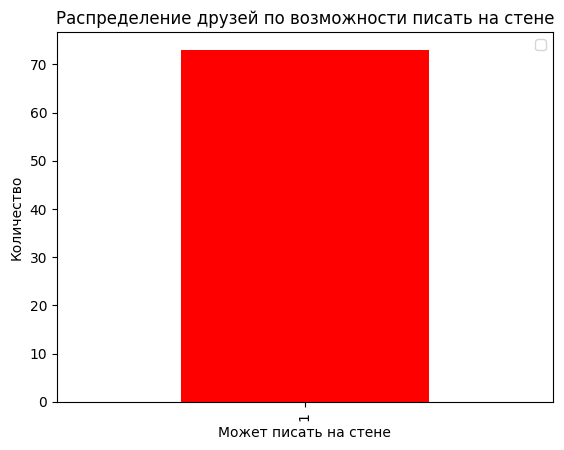

In [183]:
draw_plot(df_copy, 'can_write_private_message', 'Может писать на стене', 'Количество', 'Распределение друзей по возможности писать на стене')

In [184]:
print('Кол-во друзей с не доступом к написанию сообщения: ', df_copy[df_copy['can_write_private_message'] == False].shape[0])

Кол-во друзей с не доступом к написанию сообщения:  0


#### **4.12.1. Удаление признака can_write_private_message по причине его наличия у всех друзей**

In [185]:
del df_copy['can_write_private_message']

### **4.13. Работа с признаком contacts**

In [186]:
df_copy.contacts.unique()

array([nan])

#### **4.13.1. Удаление признака contacts по причине его пустых значений во всех строках**

In [187]:
del df_copy['contacts']

### **4.14. Работа с признаком status**

In [188]:
df_copy.status.unique()

array([nan,
       'Мои курицы-самые лучшие курицы в мире. Самые красивые и умные!',
       'всегда есть хорошие новости',
       'To see the world, things dangerous to come to, to see behind walls, to draw closer, to find each other and to feel.',
       'Ледники растают - восполнится Иордан', '💋',
       'Если вашего ухода не заметили, значит вы не зря ушли...',
       'Apocalypse Now', '👾', '🦋', 'Спеши любить', 'N.E.E.T.',
       "Why do we only rest in peace?\nWhy don't we live in peace too?",
       '♉', 'Саботаж успеха', 'Излучаю счастье🤍', 'atmosphere',
       '私は何も知りません', 'Permanent betrunken', 'Surrounded By The Void',
       'control yourself', 'Жизнь прекрасна, и с этим никто не поспорит👌',
       '_______________________', "I'm not famous anymore", '尤德', '🍺🍔🤴',
       'исполню любые твои желания',
       'I’m in the club high off purp with some shades on',
       'Be happy and smile', 'Я каскадер в этом каскаде мыслей.',
       'Жизнь одна и она слишком коротка, чтобы трати

#### **4.14.1. Проверка пустых значений статуса**

In [189]:
print('Кол-во друзей с пустым значением статуса: ', df_copy[df_copy['status'].isnull()].shape[0])

Кол-во друзей с пустым значением статуса:  43


#### **4.14.2. Конвертация признака status в категориальный признак с двумя значениями**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


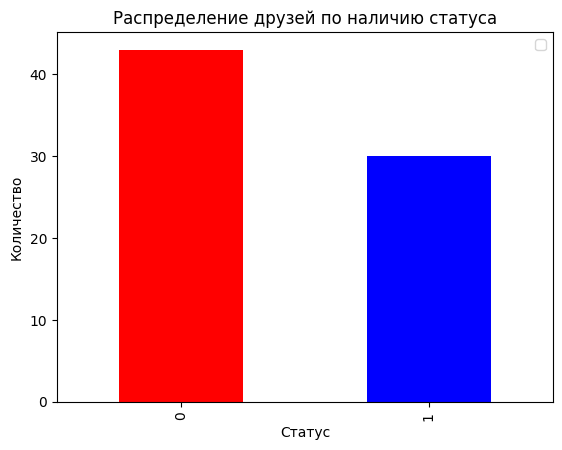

In [194]:
df_copy_status = df_copy.copy()
df_copy_status['status'].fillna(0, inplace = True)
df_copy_status['status'] = df_copy_status['status'].apply(lambda x: 1 if x != 0 else 0)
draw_plot(df_copy_status, 'status', 'Статус', 'Количество', 'Распределение друзей по наличию статуса')

### **4.15. Работа с признаком relation**

In [201]:
df_copy_relation = df_copy_status.copy(deep=True)
df_copy_relation.relation.unique()

array([0., 1., 4., 6., 5., 7., 8.])

In [202]:
df_copy_relation['relation'].fillna(0, inplace = True)

#### **4.15.1. Категоризация признака relation**

In [203]:
for i in df_copy_relation.relation:
  if i == 0: df_copy_relation.relation.replace(i, 'A', inplace=True)
  elif i == 1: df_copy_relation.relation.replace(i, 'B', inplace=True)
  elif i == 2: df_copy_relation.relation.replace(i, 'C', inplace=True)
  elif i == 3: df_copy_relation.relation.replace(i, 'D', inplace=True)
  elif i == 4: df_copy_relation.relation.replace(i, 'E', inplace=True)
  elif i == 5: df_copy_relation.relation.replace(i, 'F', inplace=True)
  elif i == 6: df_copy_relation.relation.replace(i, 'G', inplace=True)
  elif i == 7: df_copy_relation.relation.replace(i, 'H', inplace=True)
  elif i == 8: df_copy_relation.relation.replace(i, 'I', inplace=True)

df_copy_relation.relation.unique()

array(['A', 'B', 'E', 'G', 'F', 'H', 'I'], dtype=object)

### **4.16. Работа с признаком deactivated**

In [204]:
df_copy_deactivated = df_copy_relation.copy(deep=True)
df_copy_deactivated.deactivated.unique()

array([nan], dtype=object)

In [205]:
del df_copy_deactivated['deactivated']

### **4.17. Работа с признаком has_photo**

<Axes: ylabel='count'>

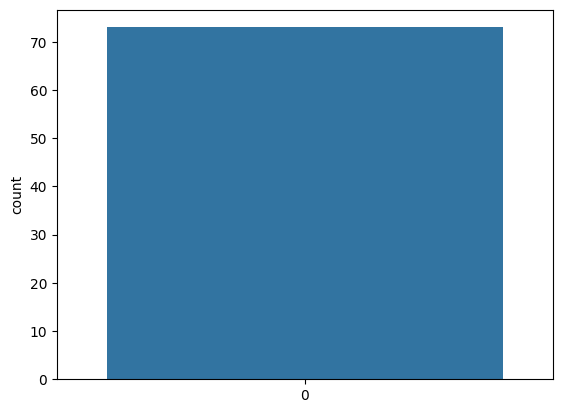

In [206]:
df_copy_has_photo = df_copy_deactivated.copy(deep=True)

sns.countplot(df_copy_has_photo.has_photo)

In [207]:
del df_copy_has_photo['has_photo']

### **4.18. Работа с признаком site**

In [208]:
df_copy_site = df_copy_has_photo.copy(deep=True)

df_copy_site.site.unique()

array([nan, 'kurskontr@gmail.com',
       'facebook.com/nguyenninel http://instagram.com/ninelnguyen/',
       'http://instagram.com/sklifvlad',
       'https://instagram.com/dinllm?r=nametag',
       'http://vk.com/app638461_57558027', 'inst: platosha.inst',
       'http://ask.fm/YuliaShomina', 'https://yasobe.ru/na/vtoroe_vyshee',
       'gazelsochi.ru', 'https://www.instagram.com/tway.tway/',
       'https://vk.com/ofa.squad', 'inst: _kstv.eva_', 'нету',
       'https://stihi.ru/avtor/mightgainer', '-',
       'http://ask.fm/Matvey28/questions/108127951726/reply',
       'https://www.instagram.com/sashamegas '], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


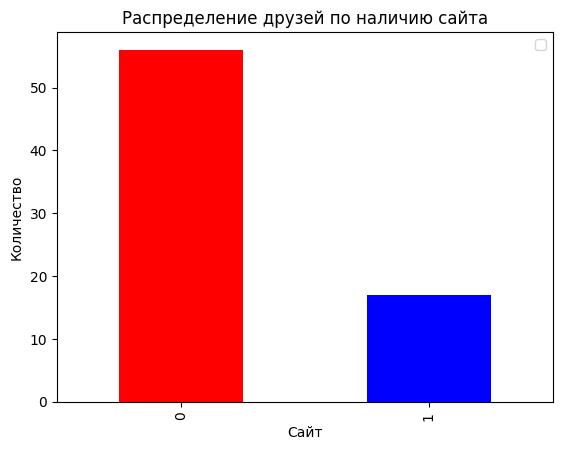

In [209]:
df_copy_site['site'].fillna(0, inplace = True)

for i in df_copy_site.site:
  if i != 0: df_copy_site.site.replace(i, 1, inplace=True)

draw_plot(df_copy_site, 'site', 'Сайт', 'Количество', 'Распределение друзей по наличию сайта')

### **4.19. Работа с признаком wall_default**

In [210]:
df_copy_wall_default = df_copy_site.copy(deep=True)

df_copy_wall_default.wall_default.unique()

array(['all', 'owner'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


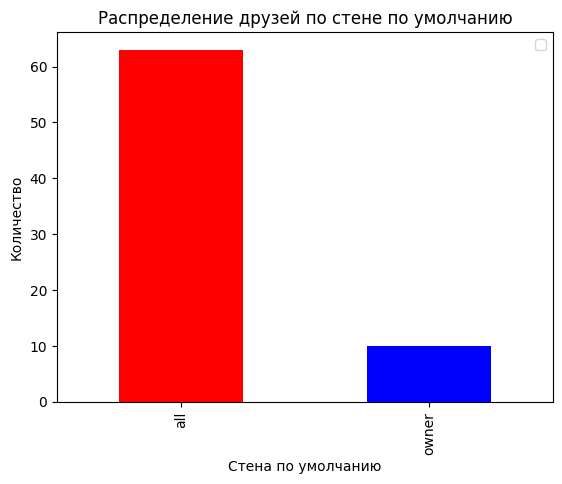

In [211]:
draw_plot(df_copy_wall_default, 'wall_default', 'Стена по умолчанию', 'Количество', 'Распределение друзей по стене по умолчанию')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


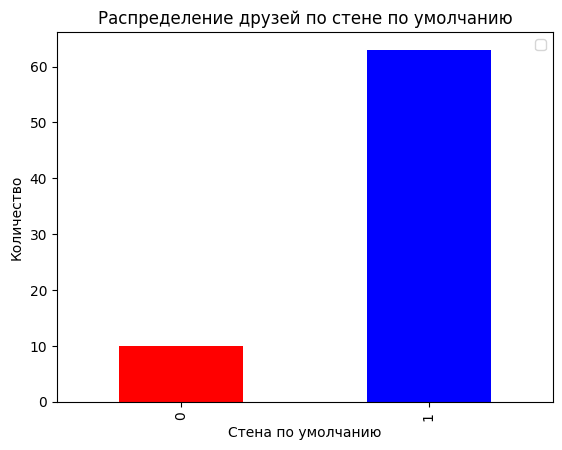

In [213]:
df_copy_wall_default.wall_default.replace('all', 1, inplace=True)
df_copy_wall_default.wall_default.replace('owner', 0, inplace=True)
draw_plot(df_copy_wall_default, 'wall_default', 'Стена по умолчанию', 'Количество', 'Распределение друзей по стене по умолчанию')

### **4.20. Работа с признаком counters**

In [223]:
df_copy_counters = df_copy_wall_default.copy(deep=True)

df_copy_counters.counters[0]

"{'albums': 0, 'audios': 0, 'followers': 56, 'friends': 614, 'online_friends': 22, 'pages': 49, 'photos': 5, 'subscriptions': 4, 'videos': 0, 'video_playlists': 0, 'mutual_friends': 12, 'clips_followers': 670}"

In [224]:
df_copy_counters['albums'] = 0
df_copy_counters['audios'] = 0
df_copy_counters['friends'] = 0
df_copy_counters['photos'] = 0
df_copy_counters['videos'] = 0

m = 0
for i in df_copy_counters.counters:

  d = eval(i)
  df_copy_counters['albums'][m] = d['albums']
  df_copy_counters['audios'][m] = d['audios']
  df_copy_counters['friends'][m] = d['friends']
  df_copy_counters['photos'][m] = d['photos']
  df_copy_counters['videos'][m] = d['videos']

  m += 1

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1653/2114381075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_counters['albums'][m] = d['albums']
/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1653/2114381075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_counters['audios'][m] = d['audios']
/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1653/2114381075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

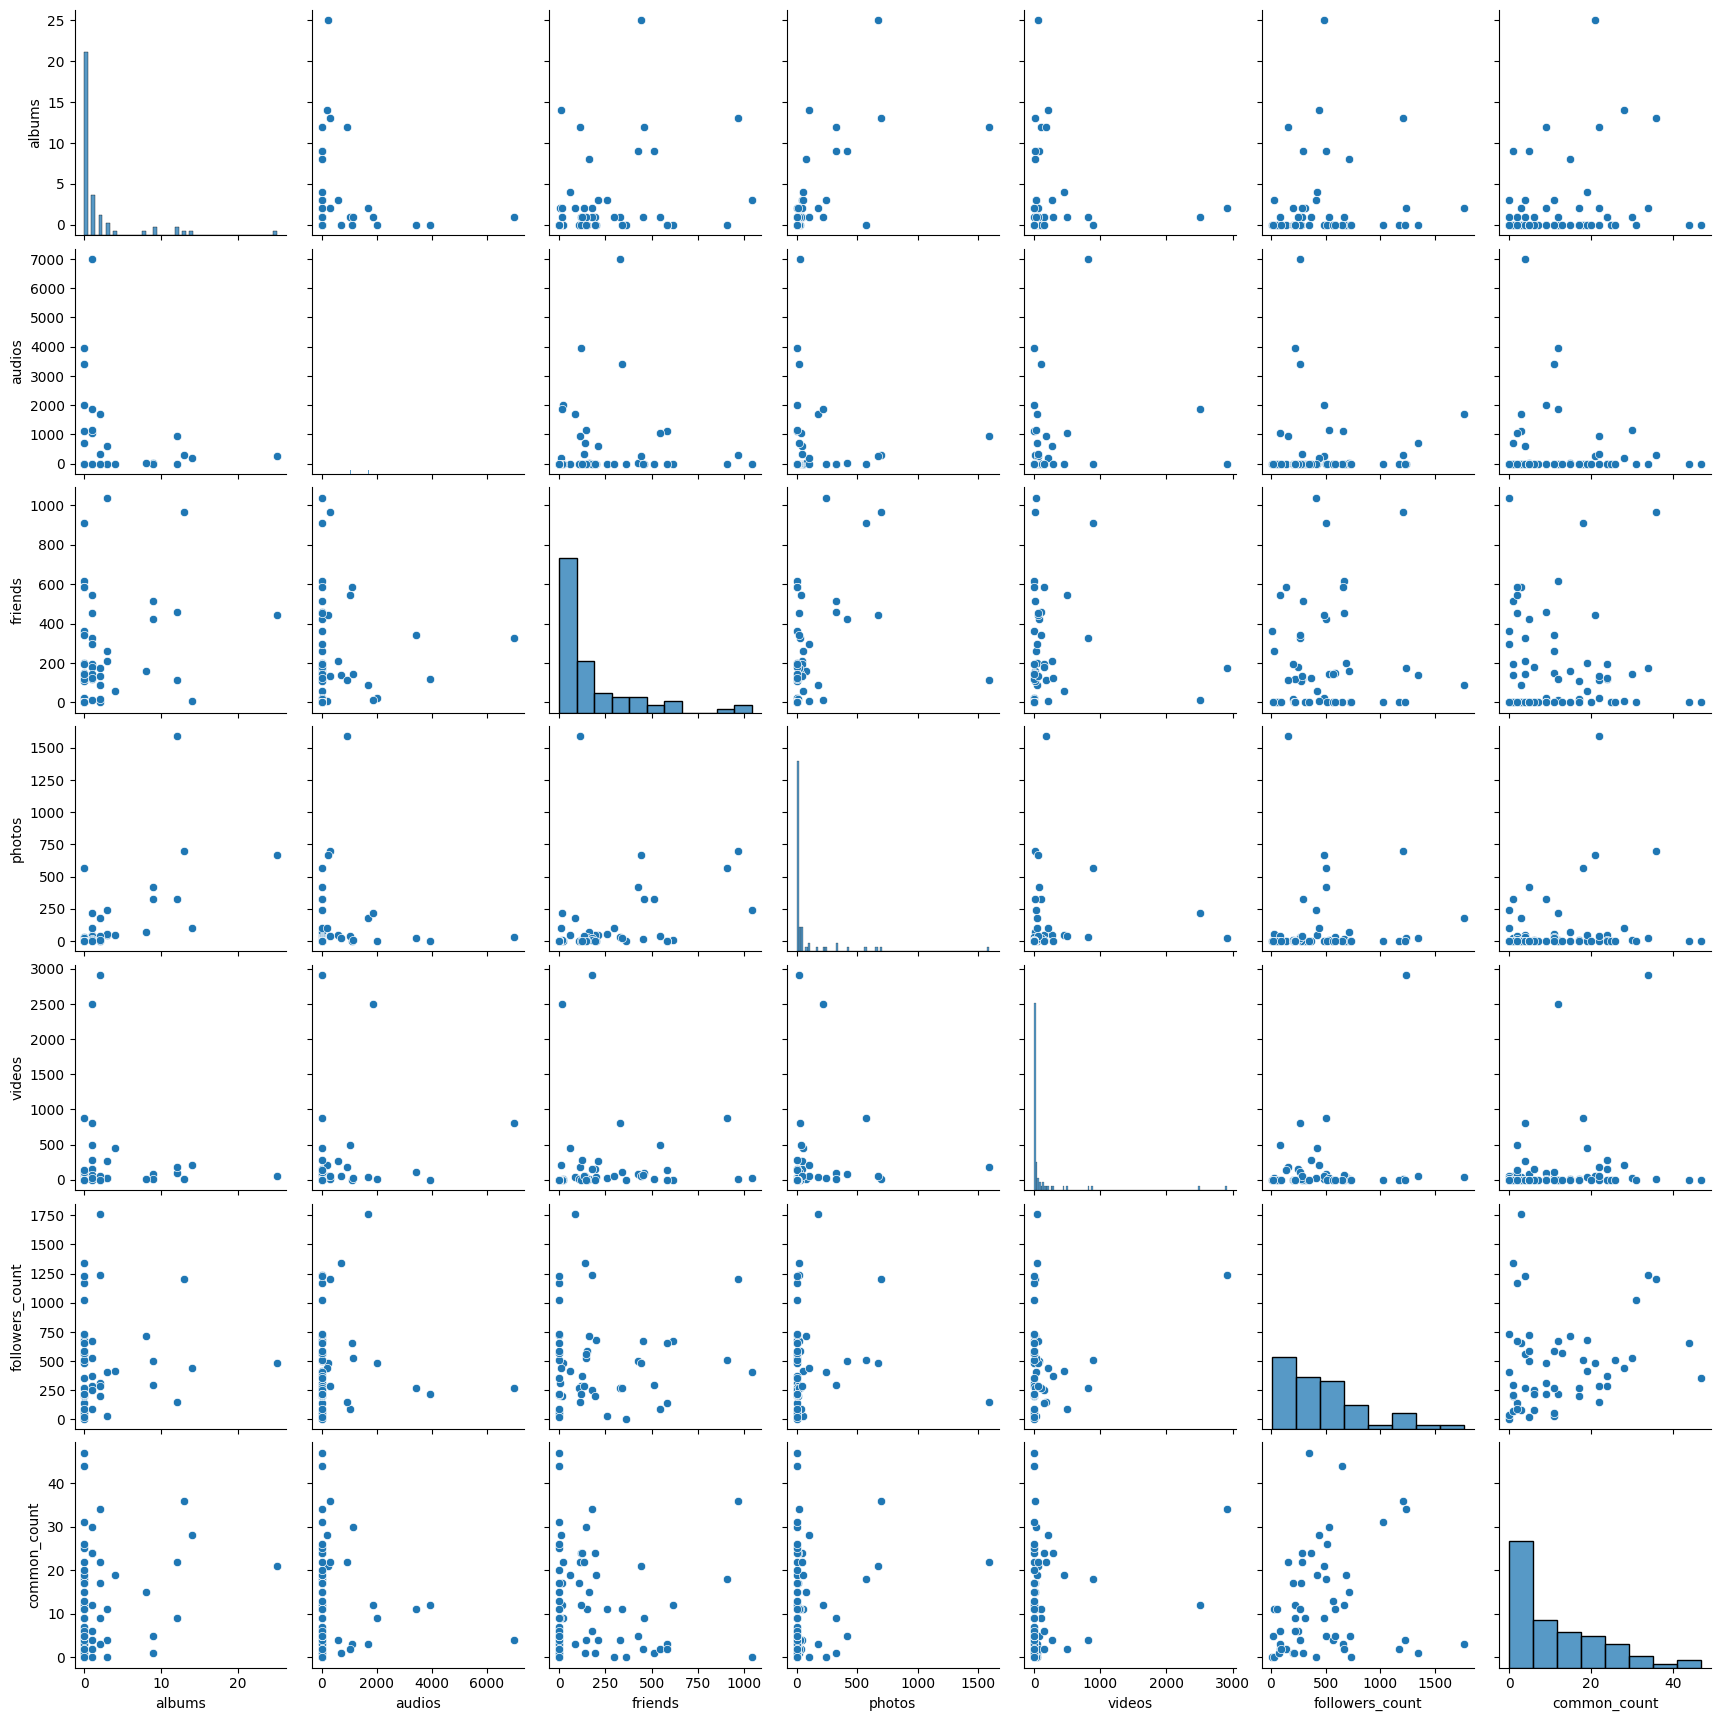

In [225]:
sns.pairplot(data=df_copy_counters[['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']])

#### **4.20.1. Удаление выбросов**

In [226]:
columns = ['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']

In [227]:
for i in columns:
  Q3 = np.quantile(df_copy_counters[i], 0.85)
  Q1 = np.quantile(df_copy_counters[i], 0.25)
  TIQR = 3 * (Q3 - Q1)
  df_copy_counters = df_copy_counters.drop(df_copy_counters[df_copy_counters[i] > (Q3 + TIQR)].index)
  df_copy_counters = df_copy_counters.drop(df_copy_counters[df_copy_counters[i] < (Q1 - TIQR)].index)

In [228]:
df_copy_counters = df_copy_counters.reset_index()

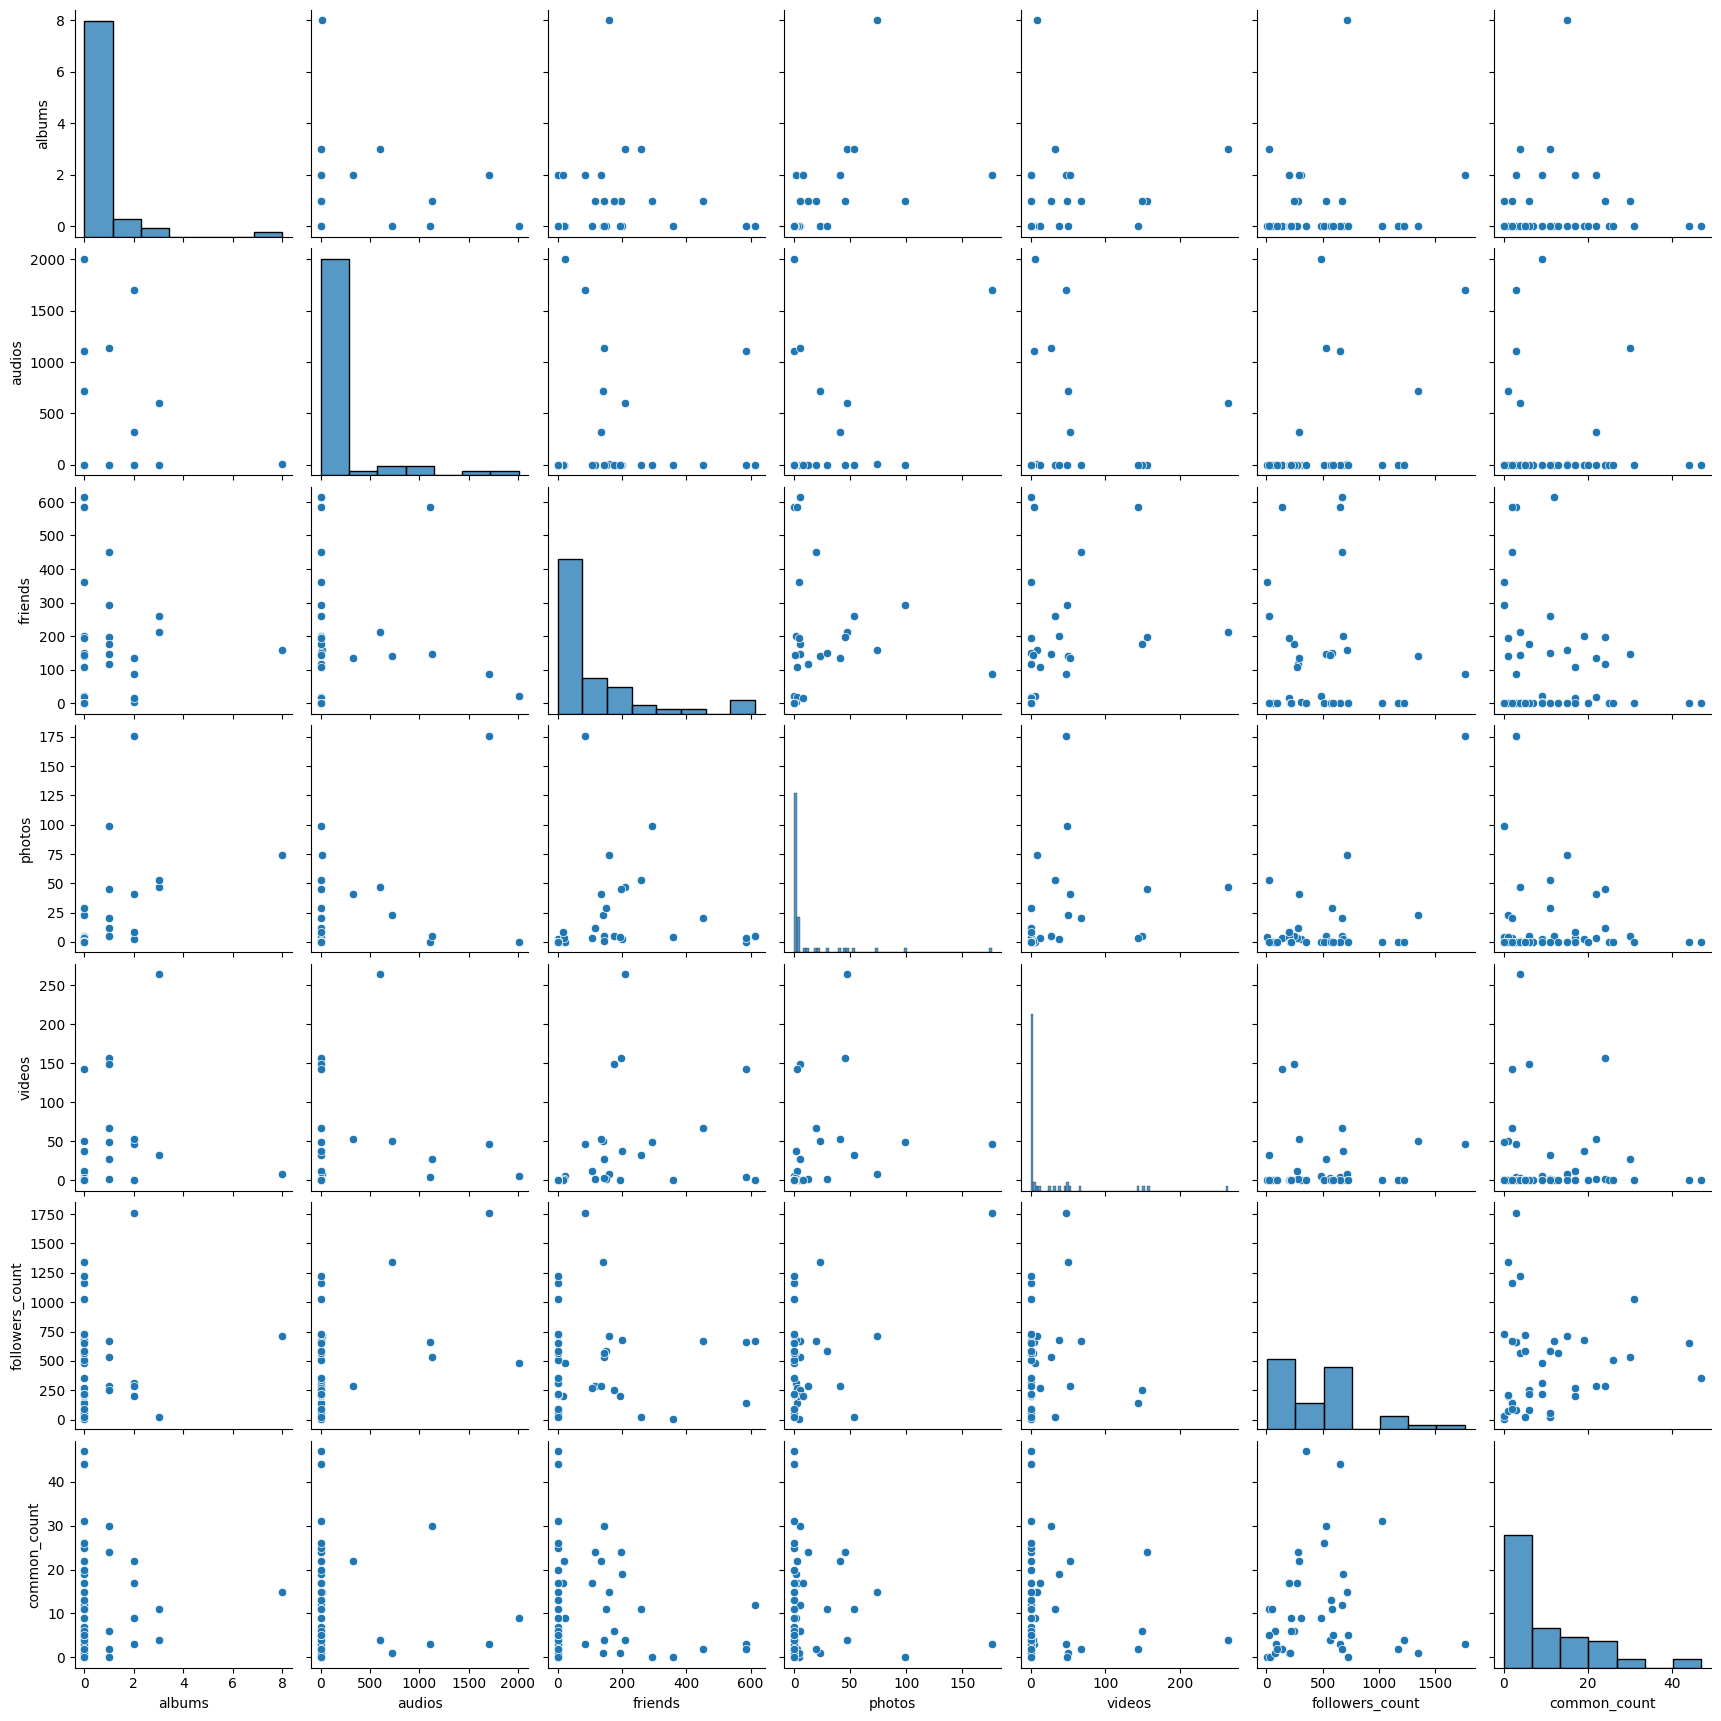

In [229]:
sns.pairplot(data=df_copy_counters[['albums', 'audios', 'friends', 'photos', 'videos', 'followers_count', 'common_count']])

### **4.21. Работа с признаком bdate**

In [230]:
df_copy_bdate = df_copy_counters.copy(deep=True)

In [231]:
df_copy_bdate.columns

Index(['index', 'Unnamed: 0', 'first_name', 'last_name', 'id', 'sex', 'bdate',
       'country', 'home_town', 'followers_count', 'common_count', 'is_closed',
       'can_see_audio', 'online', 'city', 'can_post', 'can_see_all_posts',
       'status', 'relation', 'universities', 'nickname', 'counters',
       'occupation', 'site', 'wall_default', 'albums', 'audios', 'friends',
       'photos', 'videos'],
      dtype='object')

### **4.22. Работа с признаком country**

In [233]:
df_copy_country = df_copy_counters.copy(deep=True)
df_copy_country.country.unique()

array(["{'id': 1, 'title': 'Россия'}", nan], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


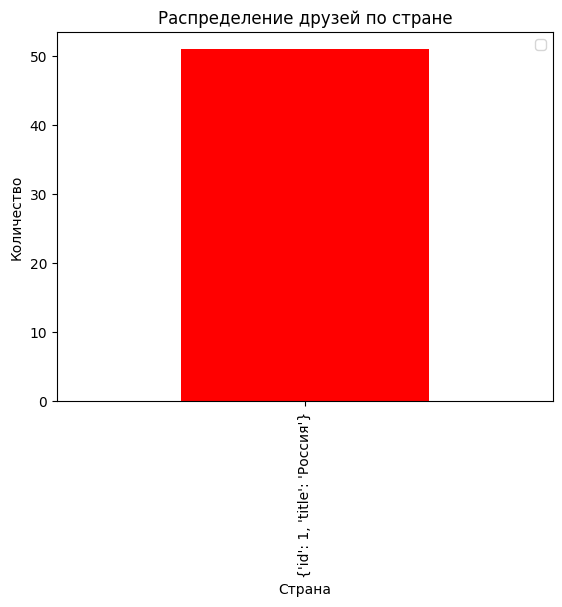

In [235]:
draw_plot(df_copy_country, 'country', 'Страна', 'Количество', 'Распределение друзей по стране')

#### **4.22.1. Мои друзья с России, поэтому признак страны не будет являться информативным**

In [236]:
del df_copy_country['country']

### **4.23. Работа с признаком occupation**

In [237]:
df_copy_occupation = df_copy_country.copy(deep=True)

In [238]:
df_copy_occupation.occupation

0     {'id': 40427933, 'name': 'МГТУ им. Н.Э. Бауман...
1     {'id': 348, 'name': 'Финансовый университет (Ф...
2     {'name': 'Mindhouse Assets Inc.', 'type': 'work'}
3     {'id': 157357145, 'name': 'BOOTCAMPER ®', 'typ...
4     {'id': 348, 'name': 'Финансовый университет (Ф...
5                                                   NaN
6       {'name': 'МБОУ "Гимназия № 9"', 'type': 'work'}
7     {'id': 86171265, 'name': 'Tesla Target. SMM дл...
8     {'id': 8351, 'name': 'СГСПУ (бывш. ПГСГА, СамГ...
9     {'id': 250, 'name': 'МГТУ им. Н. Э. Баумана', ...
10    {'id': 361, 'name': 'АГПУ (бывш. АГПА)', 'type...
11    {'id': 57, 'name': 'СПбГТИ (ТУ)', 'type': 'uni...
12    {'id': 527, 'name': 'КФУ (бывш. КГУ им. Ульяно...
13    {'id': 18870, 'name': 'МГПУ (ЧФ)', 'type': 'un...
14    {'id': 3603, 'name': 'МИУ (бывш. ЧГА)', 'type'...
15                                                  NaN
16                                                  NaN
17    {'id': 774, 'name': 'СГИК (бывш. СГАКИ)', 

In [239]:
df_copy_occupation['occupation'].fillna("{'id': 11111, 'name': 'Не указано'}", inplace = True)

In [240]:
df_copy_occupation['work'] = 0

m = 0
for i in df_copy_occupation.occupation:

  d = eval(i)
  df_copy_occupation['work'][m] = d['name']

  m += 1

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1653/1358533779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_occupation['work'][m] = d['name']


### **4.24. Работа с признаком city**

In [241]:
df_copy_city = df_copy_occupation.copy(deep=True)

In [242]:
df_copy_city['city'].fillna("{'id': 11111, 'title': 'Другой'}", inplace = True)

In [244]:
df_copy_city.city.unique()

array(["{'id': 1, 'title': 'Москва'}", "{'id': 78, 'title': 'Липецк'}",
       "{'id': 11111, 'title': 'Другой'}",
       "{'id': 143, 'title': 'Тольятти'}",
       "{'id': 123, 'title': 'Самара'}",
       "{'id': 2, 'title': 'Санкт-Петербург'}",
       "{'id': 60, 'title': 'Казань'}",
       "{'id': 158, 'title': 'Челябинск'}",
       "{'id': 133, 'title': 'Сочи'}",
       "{'id': 98, 'title': 'Новороссийск'}"], dtype=object)

In [245]:
df_copy_city['city_new'] = 0

m = 0
for i in df_copy_city.city:

  d = eval(i)
  df_copy_city['city_new'][m] = d['title']

  m += 1

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_1653/3758797772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_city['city_new'][m] = d['title']


In [246]:
df_copy_last = df_copy_city.copy(deep=True)

In [252]:
df_copy_last['followers_count'].fillna(0, inplace = True)

df_copy_last['is_closed'] = df_copy_last.is_closed.astype(int)
df_copy_last['can_see_audio'] = df_copy_last.can_see_audio.astype(int)
df_copy_last['can_see_all_posts'] = df_copy_last.can_see_all_posts.astype(int)
df_copy_last['followers_count'] = df_copy_last.followers_count.astype(int)
df_copy_last['common_count'] = df_copy_last.common_count.astype(int)

### **4.24. Создание синтетических признаков transparency_level и media**

In [254]:
df_copy_last['transparency_level'] = df_copy_last.is_closed + df_copy_last.can_see_audio + df_copy_last.can_post + df_copy_last.can_see_all_posts + df_copy_last.site + df_copy_last.wall_default

In [255]:
df_copy_last['media'] = df_copy_last.audios + df_copy_last.videos + df_copy_last.photos

In [257]:
df_copy_last.columns

Index(['index', 'Unnamed: 0', 'first_name', 'last_name', 'id', 'sex', 'bdate',
       'home_town', 'followers_count', 'common_count', 'is_closed',
       'can_see_audio', 'online', 'city', 'can_post', 'can_see_all_posts',
       'status', 'relation', 'universities', 'nickname', 'counters',
       'occupation', 'site', 'wall_default', 'albums', 'audios', 'friends',
       'photos', 'videos', 'work', 'city_new', 'transparency_level', 'media'],
      dtype='object')

In [258]:
del df_copy_last['Unnamed: 0']
del df_copy_last['index']

In [259]:
df_copy_last.columns

Index(['first_name', 'last_name', 'id', 'sex', 'bdate', 'home_town',
       'followers_count', 'common_count', 'is_closed', 'can_see_audio',
       'online', 'city', 'can_post', 'can_see_all_posts', 'status', 'relation',
       'universities', 'nickname', 'counters', 'occupation', 'site',
       'wall_default', 'albums', 'audios', 'friends', 'photos', 'videos',
       'work', 'city_new', 'transparency_level', 'media'],
      dtype='object')

In [260]:
df_last = df_copy_last[
             
             ['sex', 'first_name', 'last_name', 'relation', 'home_town', 'city_new', 'work',
               'friends', 'followers_count', 'common_count', 'transparency_level', 'media', 'albums']
             
]

In [261]:
df_last.head()

,sex,first_name,last_name,relation,home_town,city_new,work,friends,followers_count,common_count,transparency_level,media,albums
0,2,Денис,Бекасов,A,Москва и Королёв,Москва,МГТУ им. Н.Э. Баумана,614,670,12,3,5,0
1,1,Маша,Сажина,A,Липецк,Липецк,Финансовый университет (ФА) при Правительстве РФ,211,0,4,5,913,3
2,2,Antik,Designer,A,Москва,Москва,Mindhouse Assets Inc.,585,657,3,2,1115,0
3,1,Нина,Нгуен,A,Киселевск,Москва,BOOTCAMPER ®,87,1762,3,3,1928,2
4,2,Влад,Склифасовский,A,Тольятти,Москва,Финансовый университет (ФА) при Правительстве РФ,23,483,9,4,2012,0


### **5. Преобразование категориальных признаков в числовые**

In [262]:
from sklearn.preprocessing import *

df_le = df_last.copy(deep=True)
categorical_feature_mask = df_le.dtypes==object
categorical_cols = df_le.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df_le[categorical_cols] = df_le[categorical_cols].apply(lambda col: le.fit_transform(col))
df_le = df_le[categorical_cols]
#df_le = df_le.reset_index()
#df_le = df_le.astype(float)
#del df_le['index']

In [263]:
df_le.head()

,first_name,last_name,relation,home_town,city_new,work
0,19,4,0,9,3,14
1,34,33,0,6,2,30
2,0,1,0,8,3,2
3,39,23,0,5,3,0
4,12,37,0,16,3,30


### **6. Создание набора данных числовых признаков**

In [264]:
digit_feature_mask = df_last.dtypes==int
digit_cols = df_last.columns[digit_feature_mask].tolist()

In [265]:
digit_cols

['sex',
 'friends',
 'followers_count',
 'common_count',
 'transparency_level',
 'media',
 'albums']

In [266]:
df_digit = df_last[['sex', 'followers_count', 'common_count',
                 'albums', 'friends', 'media', 'transparency_level']]

### **7. Тепловая карта числовых признаков**

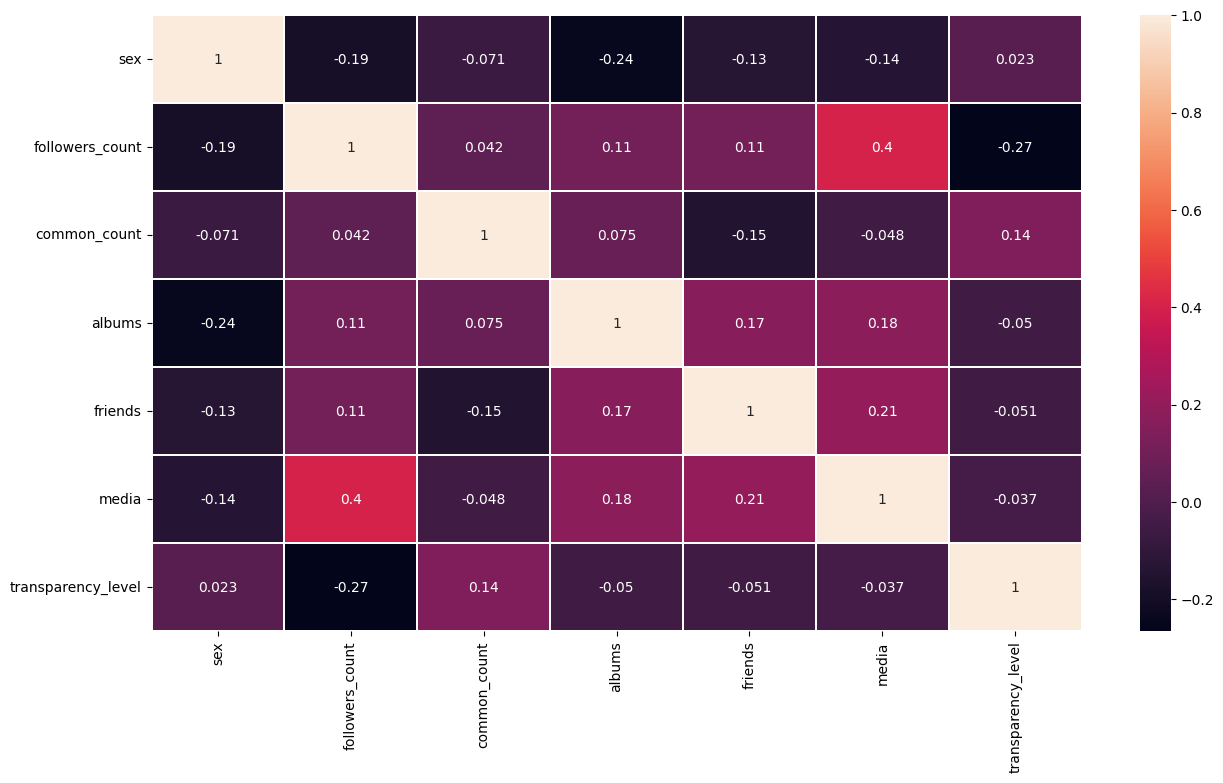

In [267]:
sns.heatmap(df_digit.corr(), annot=True, linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,8)

### **8. Создание готового набора данных для проведения кластеризации**

In [299]:
data = pd.concat([df_digit, df_le], axis=1)

In [300]:
data.head()

,sex,followers_count,common_count,albums,friends,media,transparency_level,first_name,last_name,relation,home_town,city_new,work
0,2,670,12,0,614,5,3,19,4,0,9,3,14
1,1,0,4,3,211,913,5,34,33,0,6,2,30
2,2,657,3,0,585,1115,2,0,1,0,8,3,2
3,1,1762,3,2,87,1928,3,39,23,0,5,3,0
4,2,483,9,0,23,2012,4,12,37,0,16,3,30


In [270]:
data.columns

Index(['sex', 'followers_count', 'common_count', 'albums', 'friends', 'media',
       'transparency_level', 'first_name', 'last_name', 'relation',
       'home_town', 'city_new', 'work'],
      dtype='object')

### **9. Применение методов Scaler к набору данных**

In [271]:
df_norm = data.copy(deep=True)
df_minmax = data.copy(deep=True)
df_stand = data.copy(deep=True)
df_maxabs = data.copy(deep=True)
df_robust = data.copy(deep=True)
df_powert = data.copy(deep=True)

norm = Normalizer().fit(df_norm)
minmax = MinMaxScaler().fit(df_minmax)
stand = StandardScaler().fit(df_stand)
maxabs = MaxAbsScaler().fit(df_maxabs)
robust = RobustScaler().fit(df_robust)
powert = PowerTransformer().fit(df_powert)

df_to_norm = norm.transform(df_norm)
df_to_minmax = minmax.transform(df_minmax)
df_to_stand = stand.transform(df_stand)
df_to_maxabs = maxabs.transform(df_maxabs)
df_to_robust = robust.transform(df_robust)
df_to_powert = powert.transform(df_powert)

df_norm = pd.DataFrame(df_to_norm)
df_minmax = pd.DataFrame(df_to_minmax)
df_stand = pd.DataFrame(df_to_stand)
df_maxabs = pd.DataFrame(df_to_maxabs)
df_robust = pd.DataFrame(df_to_robust)
df_powert = pd.DataFrame(df_to_powert)

df_notscaled = data.copy(deep=True)

In [272]:
df_norm.name = 'Normalizer'
df_minmax.name = 'MinMaxScaler'
df_stand.name = 'StandardScaler'
df_maxabs.name = 'MaxAbsScaler'
df_robust.name = 'RobustScaler'
df_powert.name = 'PowerTransformer'
df_notscaled.name = 'Not Scaled'

### **10. Создание конвейера для подбора лучшей модели**

In [273]:
from sklearn.cluster import *
from sklearn.metrics import *

In [274]:
float_frames = [df_norm, df_minmax, df_stand, df_maxabs, df_robust, df_powert, df_notscaled]
methods = [KMeans(), MiniBatchKMeans(), 
           AffinityPropagation(), 
           AgglomerativeClustering(), 
           MeanShift()]

metrics = pd.DataFrame(columns=['Method', 'Scaler', 'Silhouette Score', 'Davies Bouldin Score', 'Inertia'])

In [276]:
r = 5

two_methods = ['KMeans', 'MiniBatchKMeans']

for j in float_frames:
  for l in methods:
    est = l.fit(j)

    method_name = str(est)[:str(est).find('(')]

    to_df = pd.DataFrame(est.labels_)
    to_df.columns = ['labels']
    n_labels = len(to_df.labels.unique())

    if method_name in two_methods:
      if n_labels > 1:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                        'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                        'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                        'Inertia': round(est.inertia_, r)}, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)
      else:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': round(est.inertia_, r)
                                }, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)
    else:
      if n_labels > 1:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': '-'
                                }, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)
      else:
        new_row = pd.DataFrame({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': '-'
                                }, index=[0])
        metrics = pd.concat([metrics, new_row], ignore_index=True)

/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

In [277]:
metrics[(metrics['Silhouette Score'] != '-') & (metrics['Davies Bouldin Score'] != '-')].sort_values(by='Silhouette Score', ascending=False)

,Method,Scaler,Silhouette Score,Davies Bouldin Score,Inertia
23,AgglomerativeClustering,RobustScaler,0.77875,0.48822,-
33,AgglomerativeClustering,Not Scaled,0.65554,0.72791,-
32,AffinityPropagation,Not Scaled,0.53088,0.46106,-
24,MeanShift,RobustScaler,0.47545,0.34484,-
30,KMeans,Not Scaled,0.46504,0.61039,1717362.92
34,MeanShift,Not Scaled,0.45921,0.33875,-
4,MeanShift,Normalizer,0.45519,0.70262,-
3,AgglomerativeClustering,Normalizer,0.43694,0.94148,-
0,KMeans,Normalizer,0.43039,0.76124,3.52525
31,MiniBatchKMeans,Not Scaled,0.41888,0.89328,3048292.1202


### **Лучшая комбинация AgglomerativeClustering + Robust, но я воспользуюсь maxabs:**


In [278]:
ss_kmeans = []
bd_kmeans = []
ss_agg = []
bd_agg = []
ss_mb = []
bd_mb = []

x = df_maxabs

for k in range(2, 11):
  est = KMeans(n_clusters=k)
  est.fit(x)
  ss_kmeans.append(silhouette_score(x, est.labels_))
  bd_kmeans.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = AgglomerativeClustering(n_clusters=k)
  est.fit(x)
  ss_agg.append(silhouette_score(x, est.labels_))
  bd_agg.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = MiniBatchKMeans(n_clusters=k)
  est.fit(x)
  ss_mb.append(silhouette_score(x, est.labels_))
  bd_mb.append(davies_bouldin_score(x, est.labels_))

/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

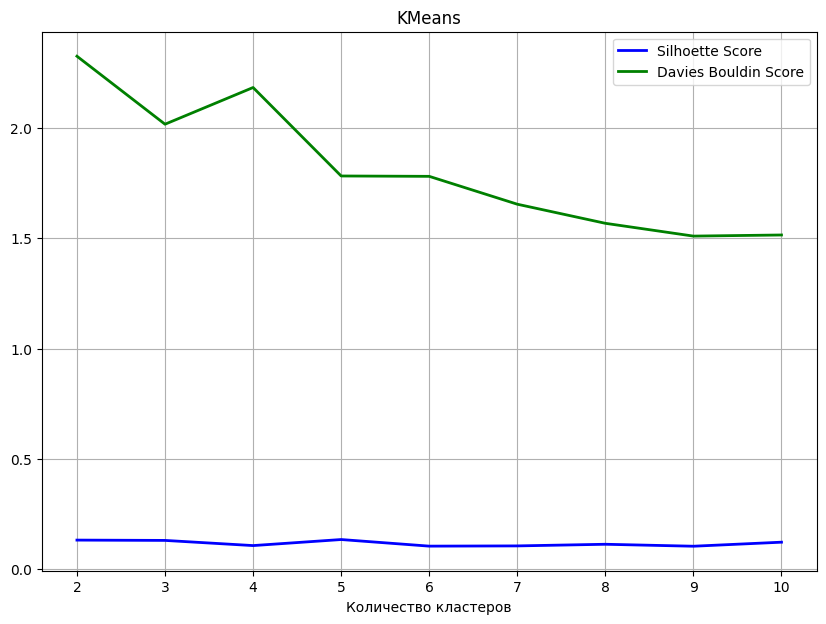

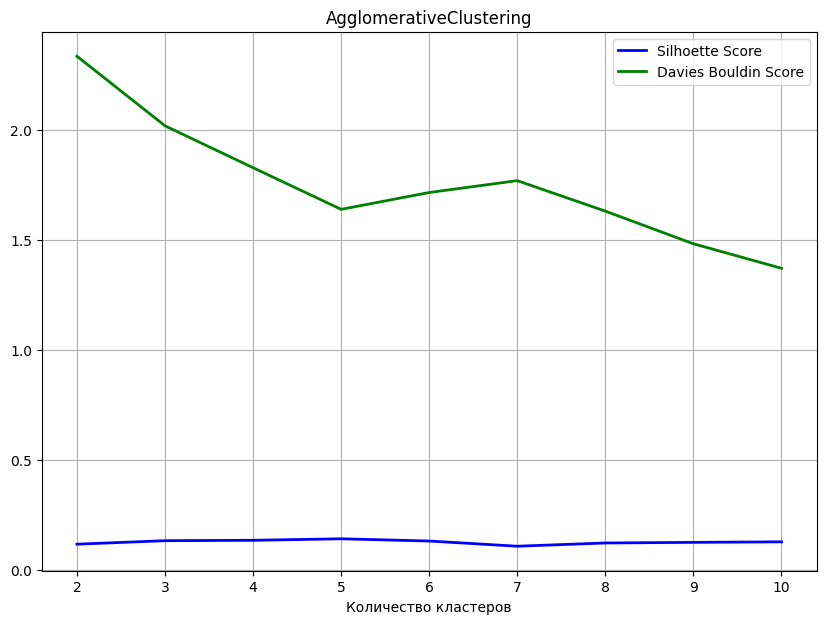

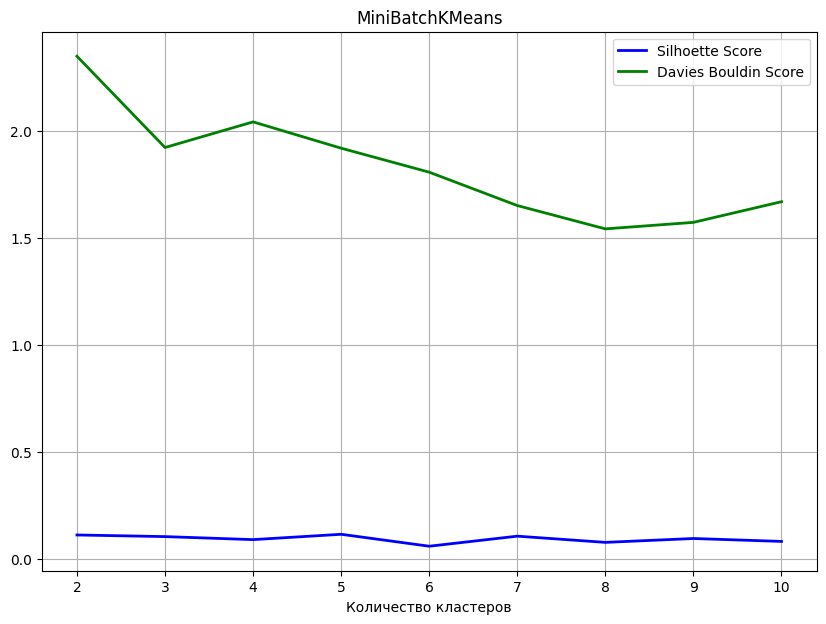

In [279]:
plt.figure(figsize=(10, 7))
plt.plot(ss_kmeans, linewidth=2, color='blue')
plt.plot(bd_kmeans, linewidth=2, color='green')
plt.title('KMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

points = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_agg, linewidth=2, color='blue')
plt.plot(bd_agg, linewidth=2, color='green')
plt.title('AgglomerativeClustering')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_mb, linewidth=2, color='blue')
plt.plot(bd_mb, linewidth=2, color='green')
plt.title('MiniBatchKMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

1. KMeans предлагает оптимальное количество кластеров 5, так как при таком количестве кластеров DBS еще не сильно скакнул, а SS максимально. 

2. AgglomerativeClustering предлагает оптимальное количество кластеров 5, так как DBS и SS максимальное

3. MiniBatchKMeans предлагает оптимальное количество кластеров 4, так как при таком количестве кластеров DBS подходящий, а SS оптимальный

In [288]:
x = df_maxabs
est = AgglomerativeClustering(n_clusters=8)
est.fit(x)

AgglomerativeClustering(n_clusters=8)

In [289]:
print('SS/DBS', 
      round(silhouette_score(x, est.labels_), 5),
      '/',
      round(davies_bouldin_score(x, est.labels_), 5))

SS/DBS 0.12288 / 1.62959


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


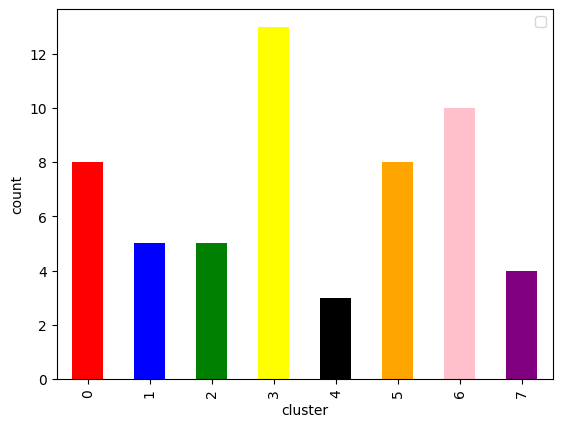

In [295]:
labels = pd.DataFrame(est.labels_)
labels.columns = ['cluster']
df_clusters = pd.concat([df_last, labels], axis=1)
draw_plot(df_clusters, 'cluster', 'cluster', 'count', '')

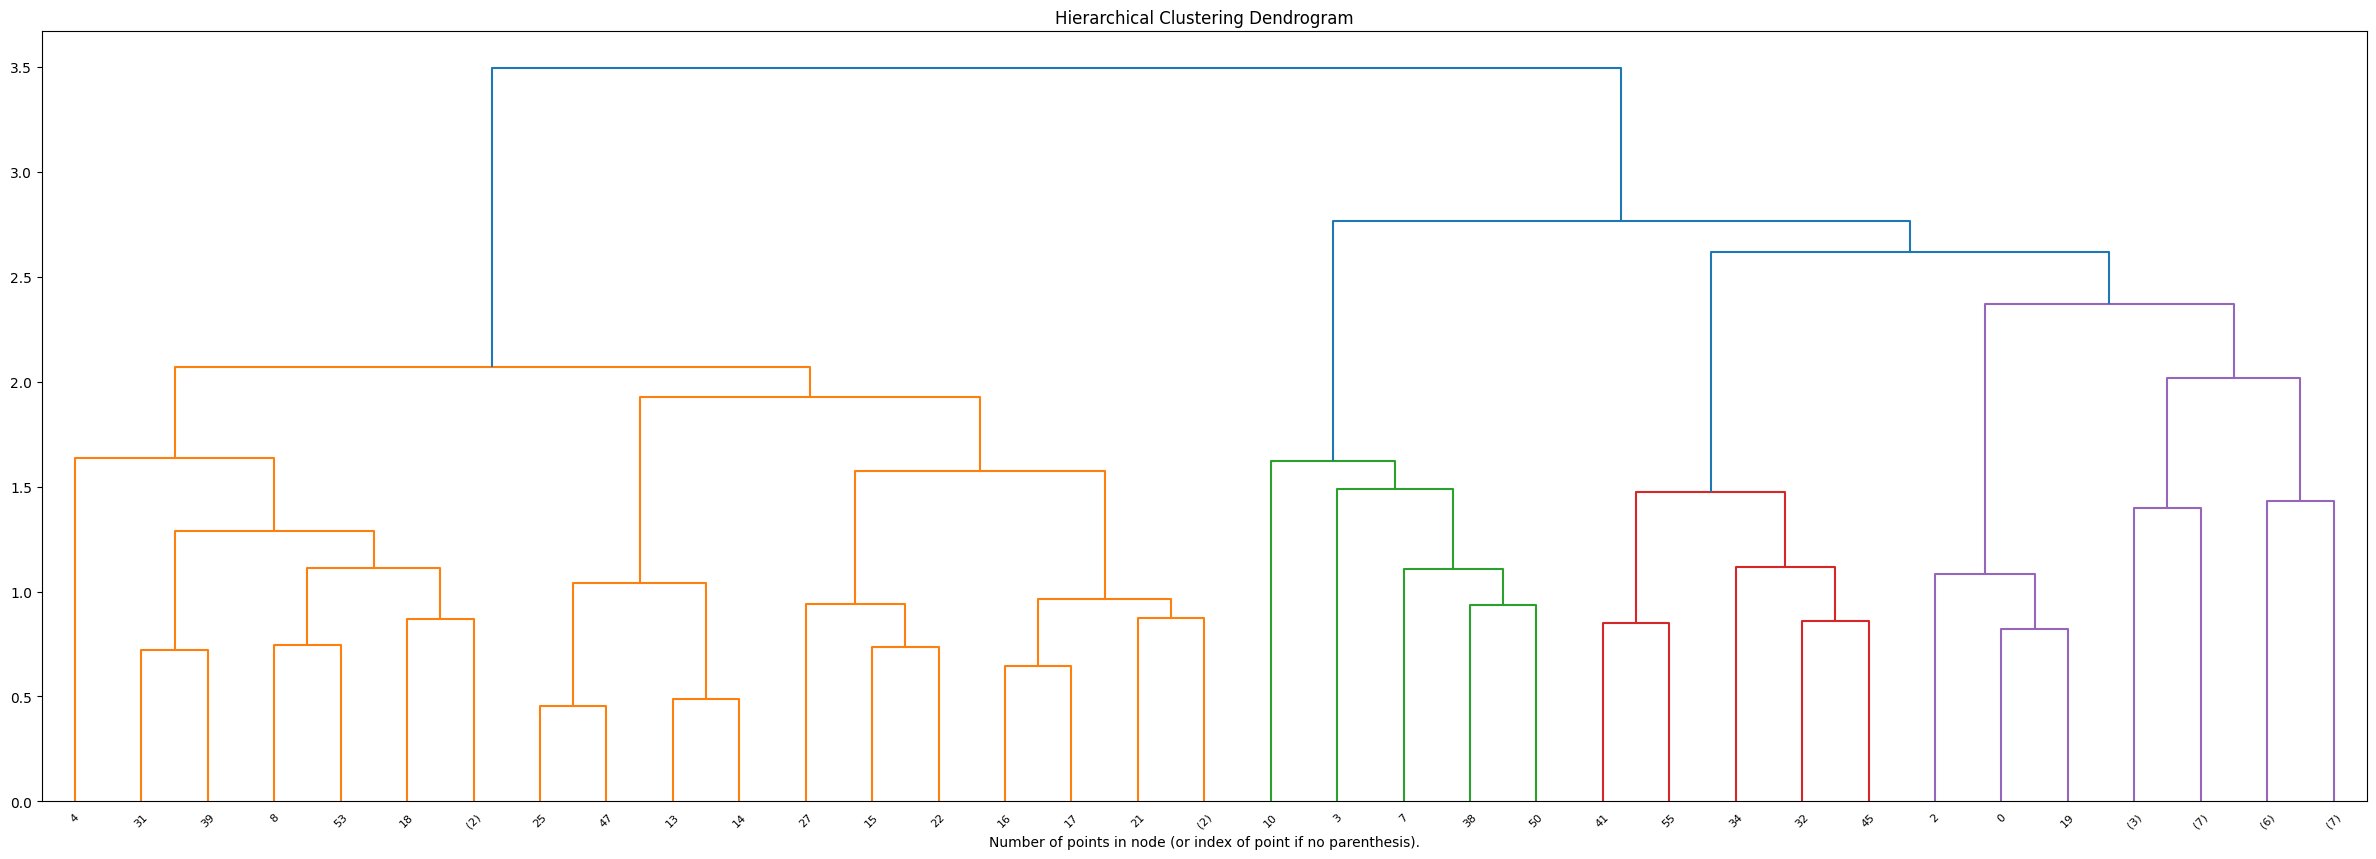

In [297]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_maxabs)
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()